# Principal Component Analysis

#### 데이터 집합 내에 존재하는 각 데이터의 차이를 가장 잘 나타내는 요소를 찾아내는 방법
#### 통계 데이터 분석(주성분 찾기), 데이터 압축(차원감소), 노이즈 제거 등 다양한 분야에서 사용

---
# 예제



### (1) 데이터 생성

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('whitegrid')

rng = np.random.RandomState(13)
rng

RandomState(MT19937) at 0x278130E5240

In [3]:
np.dot(rng.rand(2, 2), rng.randn(2, 200)).shape   # np.dot : 행렬곱

(2, 200)

In [4]:
rng.rand(2, 2)

array([[0.60735693, 0.79695268],
       [0.81266616, 0.26598051]])

- 임의로 0-1 사이의 값 4개를 뽑아 2 * 2 행렬을 만든다.

In [5]:
rng.randn(2, 200)

array([[-2.23305285e+00,  1.42026788e-01,  7.42047827e-01,
         1.11144113e+00,  4.49767208e-01, -1.43039670e+00,
         9.42539772e-01, -5.35146593e-01, -4.58967168e-01,
         1.15152877e+00, -1.97741771e+00,  2.23864876e+00,
         9.00084997e-01,  8.89032373e-01, -1.52296574e-01,
         7.04626895e-01,  6.12955068e-01,  2.39663182e-01,
        -1.51202147e+00,  4.44697716e-01,  2.53220525e-01,
         9.40787068e-01,  4.17302320e-01,  2.69558553e-01,
         1.68721062e-01, -1.48895017e+00, -1.85526666e+00,
        -1.10321722e-01, -7.04604762e-01,  4.55318527e-01,
        -1.22067190e+00, -5.65046518e-01,  7.06188812e-01,
         5.04389807e-03, -8.73259179e-01,  5.56018081e-01,
         2.67381976e-01, -1.03193483e+00, -6.35903189e-01,
         1.99779097e-01, -1.96516643e-01, -2.64890894e-01,
        -5.36168707e-01, -2.69395632e+00,  4.81339952e-01,
         3.08090862e-01, -1.37528268e-01, -1.80036570e+00,
        -4.19985810e-01, -2.85337341e-02, -2.31813179e-0

- 표준정규분포를 따르는 숫자들을 2 * 200 행렬로 만든다.

In [6]:
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
X.shape

(200, 2)

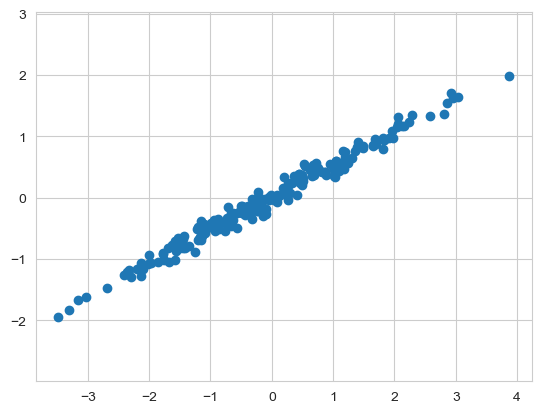

In [7]:
plt.scatter(X[:,0], X[:, 1])
plt.axis('equal');

### (2) PCA 사용
- n_components : 주성분 개수

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2, random_state=13)
pca.fit(X)

PCA(n_components=2, random_state=13)

#### 벡터
- 데이터(X)를 설명하는 벡터값
- n_components 를 2 로 설정했기 때문에 결과값이 2개만 반환된다.

In [10]:
pca.components_  

array([[ 0.88084968,  0.47339608],
       [-0.47339608,  0.88084968]])

#### 분산값
- 위의 각 벡터들의 설명력
- 첫번째 벡터가 1.64558875 로, 설명력이 매우 좋다

In [11]:
pca.explained_variance_   

array([2.36420859, 0.00765959])

In [12]:
pca.explained_variance_ratio_

array([0.99677065, 0.00322935])

- 첫번째 벡터가 데이터를 95% 정도 설명하고,
- 두번째 벡터가 4% 정도를 설명하고 있다.

#### 시각화

In [13]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, color='black', shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

- ax = ax or plt.gca() : ax값이 입력되면 그걸 쓰고, 없으면 plt.gca()
- 
- ax.annotate('', v1, v0, arrowprops=arrowprops) : 글자는 ''(공백) / v1부터 v0 까지 그려라 / arrowprops: 화살표

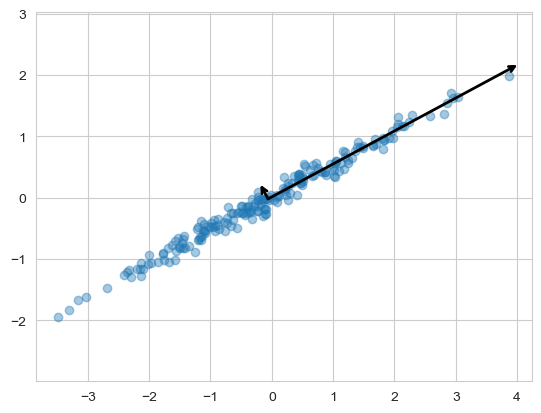

In [14]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)   # 3 은 크기변화를 위해 넣은 임의의 숫자
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal')
plt.show()

- 화살표가 꺾이는 지점이 pca.mean_

In [15]:
 pca.mean_

array([-0.06094512, -0.01924438])

#### 내가만든 X 데이터는 그래프에 나타난 2개 벡터로 요약(설명) 할 수 있다.
#### 그걸 **주성분(PC1, PC2, ...)** 이라고 한다.
#### 데이터의 주성분을 찾은 다음, 주죽을 주성분으로 변경하는 것도 가능하다.

---
### (3) PAC 사용 : n_components 를 1로 설정

In [16]:
pca = PCA(n_components=1, random_state=13)
pca.fit(X)

PCA(n_components=1, random_state=13)

In [17]:
pca.components_  

array([[0.88084968, 0.47339608]])

In [18]:
pca.mean_

array([-0.06094512, -0.01924438])

In [19]:
pca.explained_variance_ratio_

array([0.99677065])

#### 데이터 transform
- 2차원이던 X 데이터를 1차원으로 압축
- 위에서 찾은 주성분 1개를 축으로 사용해 압축

In [20]:
X_pca = pca.transform(X)  

X_pca

array([[-1.16907696],
       [ 0.41098735],
       [-2.58936473],
       [-1.10560664],
       [ 0.58829604],
       [-2.31426532],
       [-0.74057828],
       [-0.11342959],
       [ 1.01702099],
       [-0.47729745],
       [ 0.5971601 ],
       [ 1.02330876],
       [ 1.23280023],
       [-1.49791541],
       [-0.61315049],
       [-3.92566171],
       [ 0.27841157],
       [ 2.70838583],
       [ 0.57258409],
       [-0.14370453],
       [ 3.44352048],
       [-0.10810966],
       [-0.34391027],
       [-2.37450399],
       [ 1.1853752 ],
       [-1.30851953],
       [-3.71814968],
       [-0.1622459 ],
       [ 1.12569193],
       [ 0.9636516 ],
       [ 0.32062563],
       [ 0.58521992],
       [-0.08544693],
       [-1.23357776],
       [ 0.96837307],
       [-1.64737546],
       [-0.2124223 ],
       [-0.93271333],
       [-0.44878592],
       [ 0.07593325],
       [-2.18036242],
       [ 1.43316992],
       [-1.17148067],
       [-0.12462251],
       [ 1.72399623],
       [-1

In [21]:
pca.inverse_transform(X_pca)   # 압축한걸 다시 2차원 으로 변환(X와 동일하진 않음)

array([[-1.09072618, -0.57268083],
       [ 0.30107296,  0.17531542],
       [-2.34178621, -1.24503949],
       [-1.03481837, -0.54263423],
       [ 0.45725526,  0.25925266],
       [-2.09946498, -1.1148085 ],
       [-0.71328326, -0.36983123],
       [-0.16085954, -0.0729415 ],
       [ 0.83489749,  0.46220937],
       [-0.48137243, -0.24519512],
       [ 0.46506316,  0.26344887],
       [ 0.84043608,  0.46518597],
       [ 1.02496657,  0.56435841],
       [-1.38038343, -0.72835166],
       [-0.60103853, -0.30950742],
       [-3.51886297, -1.87763723],
       [ 0.18429362,  0.11255456],
       [ 2.32473567,  1.26289484],
       [ 0.44341539,  0.25181468],
       [-0.18752721, -0.08727354],
       [ 2.97227878,  1.6109047 ],
       [-0.15617348, -0.07042307],
       [-0.36387837, -0.18205015],
       [-2.15252619, -1.14332525],
       [ 0.98319224,  0.54190759],
       [-1.21355413, -0.63869239],
       [-3.33607607, -1.77940185],
       [-0.20385937, -0.09605095],
       [ 0.93062026,

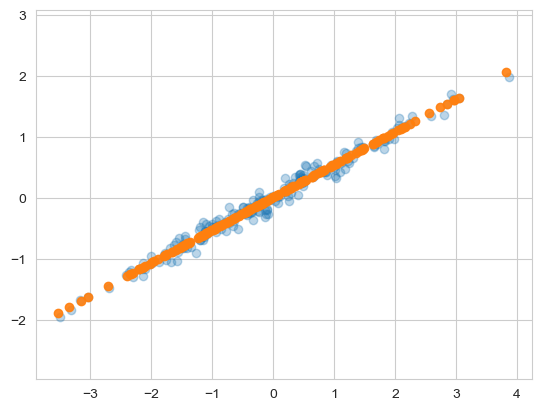

In [22]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.9)
plt.axis('equal')
plt.show()

---
# 실습 - Iris data

In [23]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target
iris_pd.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

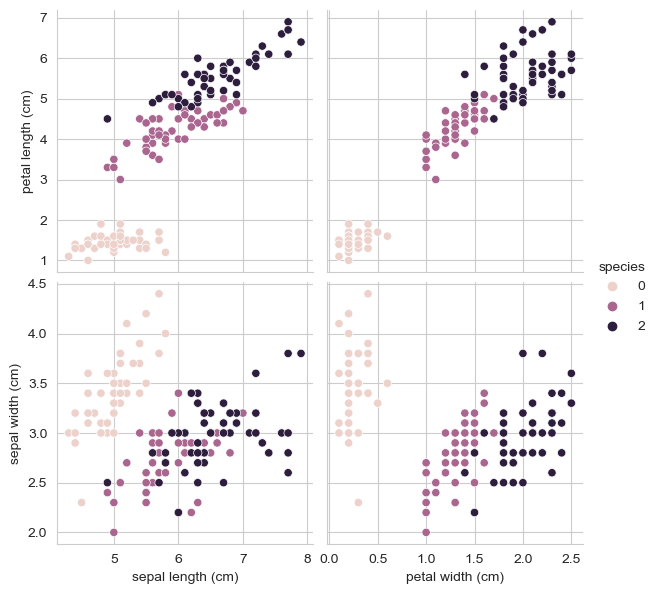

In [24]:
import seaborn as sns

sns.pairplot(iris_pd, hue='species', height=3, x_vars=['sepal length (cm)', 'petal width (cm)'],
            y_vars = ['petal length (cm)', 'sepal width (cm)']);

- 특성 4개를 한번에 구분하는 것은 어렵다.

### Scaler 적용
- PCA 에서는 Scaler 적용이 꽤 중요하다고 알려져있다.

In [25]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

### PAC 결과를 반환하는 함수 

In [26]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):  # n_components=2 : 입력된 데이터의 n개 특성을 2개로 압축
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)
    
    return pca.transform(ss_data), pca

In [27]:
iris_pca, pca = get_pca_data(iris_ss, 2)
iris_pca.shape

(150, 2)

In [28]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

- 각 특성들(sepal length, sepal width, petal length, petal width)의 평균값
- n_components 값과는 관계없음

In [29]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

- 특성이 4개라서 4개의 값
- n_components=2 로 설정했기 때문에 벡터 2개 로 반환

### PAC 결과를 pandas 로 정리

In [30]:
def get_pd_from_pca(pca_data, cols=['PC1', 'PC2']):
    return pd.DataFrame(pca_data, columns=cols)

In [31]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head()

PC1       PC2  species
0 -2.264703  0.480027        0
1 -2.080961 -0.674134        0
2 -2.364229 -0.341908        0
3 -2.299384 -0.597395        0
4 -2.389842  0.646835        0

- 4개였던 특성이 2개로 줄어들었다.

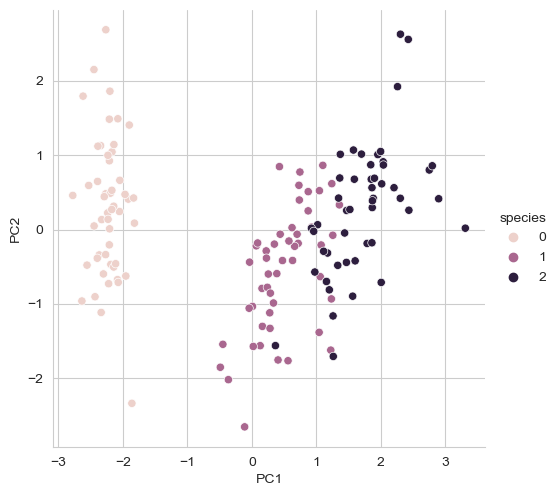

In [32]:
sns.pairplot(iris_pd_pca, hue='species', height=5, x_vars=['PC1'], y_vars=['PC2']);

###  RandomForest_4개 특성 모두 사용

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(random_state=13, n_estimators=100)
    score_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)
    
    print('Score : ', np.mean(score_rf))

In [34]:
rf_scores(iris_ss, iris.target)

Score :  0.96


### RandomForest_PCA 결과 (특성2) 를 사용

In [35]:
pca_X = iris_pd_pca[['PC1', 'PC2']]
rf_scores(pca_X, iris.target)

Score :  0.9066666666666666


---
# 실습_Wine data
- 와인 색상 분류(red/white)

In [36]:
import pandas as pd

wine_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv"

wine = pd.read_csv(wine_url, index_col=0)
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  color  
0      9.4        5      1  
1      9.8        5      1  
2      9.8        5      1  
3      9.8        6      1  
4      9.4        5      1

In [37]:
wine_y = wine['color']
wine_X = wine.drop(['color'], axis=1)
wine_X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Scaler 적용

In [38]:
wine_ss = StandardScaler().fit_transform(wine_X)
wine_ss[:3]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961]])

### PCA 적용_1 (n_components=2)

In [39]:
pca_wine, pca = get_pca_data(wine_ss, n_components=2)
pca_wine.shape

(6497, 2)

In [40]:
def print_variance_ratio(pca):
    print('variance_ratio : ', pca.explained_variance_ratio_)
    print('sum of variance_ratio : ', np.sum(pca.explained_variance_ratio_))

In [41]:
print_variance_ratio(pca)

variance_ratio :  [0.25346226 0.22082117]
sum of variance_ratio :  0.47428342743236185


- 첫번째 벡터가 데이터를 25% 정도 설명하고, 두번째 벡터가 22% 정도를 설명하고 있다.
- 두 벡터가 전체 데이터의 47% 밖에 설명하지 못한다.

### 그래프로 확인

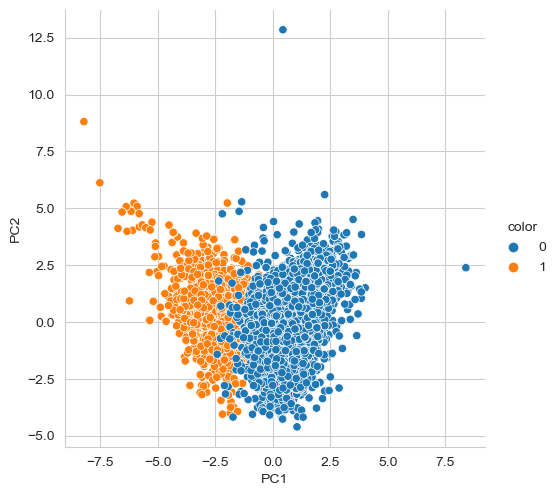

In [42]:
pca_col = ['PC1', 'PC2']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_col)
pca_wine_pd['color'] = wine_y.values

sns.pairplot(pca_wine_pd, hue='color', height=5, x_vars=['PC1'], y_vars=['PC2']);

- 완전 나쁘진 않은듯..?

###  RandomForest_원본데이터(특성 모두 사용)

In [43]:
rf_scores(wine_ss, wine_y)

Score :  0.9935352638124


###  RandomForest_PCA 결과 사용

In [44]:
pca_X = pca_wine_pd[['PC1', 'PC2']]
rf_scores(pca_X, wine_y)

Score :  0.981067803635933


- 원본 데이터와 큰 차이가 없다.

### PCA 적용_2 (n_components=3)

In [45]:
pca_wine, pca = get_pca_data(wine_ss, n_components=3)
pca_wine.shape

(6497, 3)

In [46]:
print_variance_ratio(pca)

variance_ratio :  [0.25346226 0.22082117 0.13679223]
sum of variance_ratio :  0.6110756621838707


- 61%로 상승!

In [47]:
cols = ['PC1', 'PC2', 'PC3']
pca_wine_pd = get_pd_from_pca(pca_wine, cols=cols)

pca_wine_pd

PC1       PC2       PC3
0    -3.348438  0.568926 -2.727386
1    -3.228595  1.197335 -1.998904
2    -3.237468  0.952580 -1.746578
3    -1.672561  1.600583  2.856552
4    -3.348438  0.568926 -2.727386
...        ...       ...       ...
6492  0.112718 -1.912247 -0.061138
6493  1.720296  1.009571 -0.662488
6494  0.626922 -0.622145 -0.149483
6495  0.491934 -3.755928 -0.080284
6496  0.761555 -2.767840  0.176820

[6497 rows x 3 columns]

In [48]:
pca_X = pca_wine_pd[cols]
rf_scores(pca_X, wine_y)

Score :  0.9832236631728548


### 주성분 3개로 표현한 것 정리

In [49]:
pca_wine_plot = pca_X
pca_wine_plot['color'] = wine_y.values
pca_wine_plot.head()

PC1       PC2       PC3  color
0 -3.348438  0.568926 -2.727386      1
1 -3.228595  1.197335 -1.998904      1
2 -3.237468  0.952580 -1.746578      1
3 -1.672561  1.600583  2.856552      1
4 -3.348438  0.568926 -2.727386      1

### 3D로 시각화

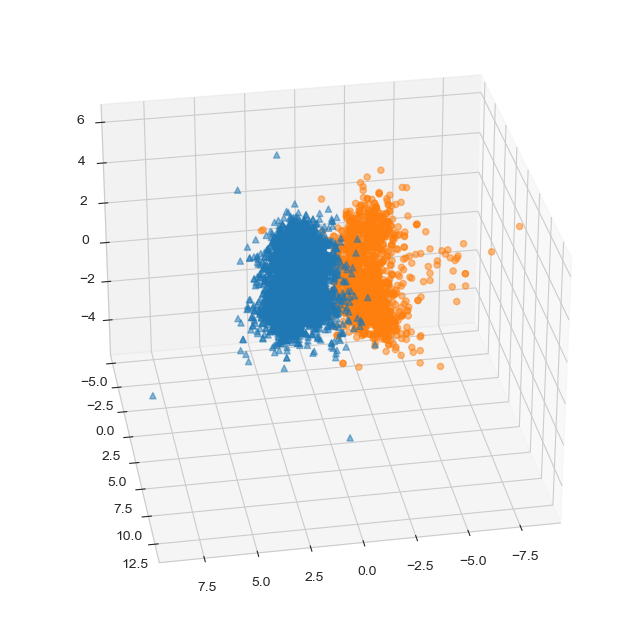

In [50]:
from mpl_toolkits.mplot3d import Axes3D

markers = ['^', 'o']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, marker in enumerate(markers):
    x_axis_data = pca_wine_plot[pca_wine_plot['color'] == i]['PC1']
    y_axis_data = pca_wine_plot[pca_wine_plot['color'] == i]['PC2']
    z_axis_data = pca_wine_plot[pca_wine_plot['color'] == i]['PC3']
    
    ax.scatter(x_axis_data, y_axis_data, z_axis_data, s=20, alpha=0.5, marker=marker)

ax.view_init(30, 80)
plt.show()

In [51]:
import plotly.express as px

fig = px.scatter_3d(pca_wine_plot, x='PC1', y='PC2', z='PC3', color='color', symbol='color', opacity=0.4)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

- color='color', symbol='color' : pca_wine_plot 의 color 컬럼을 사용

---
# PCA eigenface - Olivetti 데이터
- 이 데이터는 얼굴 인식용으로 사용할 수 있지만, 그중 특정 인물의 데이터(10장) 만 PCA 실습에 사용

In [52]:
from sklearn.datasets import fetch_olivetti_faces

face_all = fetch_olivetti_faces()
print(face_all.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

### 특정 샘플만 검색
- 참가번호가 20번인 사람의 사진 10장

In [53]:
K = 20
faces = face_all.images[face_all.target == K]
faces[:1]

array([[[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.42975205,
         0.42561984, 0.41735536],
        [0.5082645 , 0.5123967 , 0.5206612 , ..., 0.42975205,
         0.42975205, 0.4214876 ],
        [0.4876033 , 0.5123967 , 0.5289256 , ..., 0.4338843 ,
         0.42975205, 0.42975205],
        ...,
        [0.3305785 , 0.44214877, 0.45041323, ..., 0.55785125,
         0.5495868 , 0.5413223 ],
        [0.35123968, 0.4338843 , 0.446281  , ..., 0.54545456,
         0.55785125, 0.55785125],
        [0.33471075, 0.4338843 , 0.44214877, ..., 0.56198347,
         0.55785125, 0.5661157 ]]], dtype=float32)

In [54]:
faces[0].shape

(64, 64)

### 추출한 데이터를 plt를 사용해 그려보기

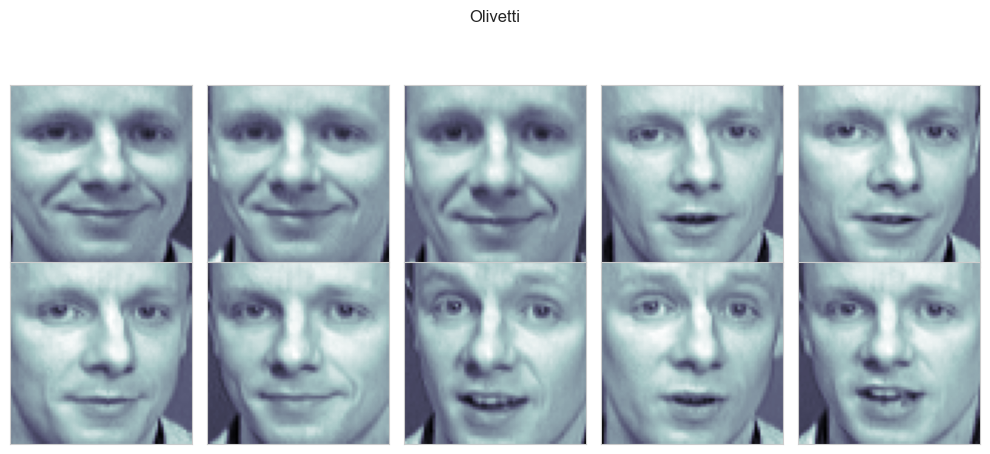

In [55]:
import matplotlib.pyplot as plt

N = 2
M = 5   # 2행 5열

fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)  # 각 사진의 위치 지정
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([]) # 공백설정
    ax.yaxis.set_ticks([]) # 공백설정

plt.suptitle("Olivetti")
plt.tight_layout()
plt.show()

### PCA 적용_1 (n_components=2)

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components=2)

X = face_all.data[face_all.target == K]

In [58]:
X.shape

(10, 4096)

- 4096 = 64 * 64 
- 이 사진은 64픽셀

In [59]:
W = pca.fit_transform(X)

print(W.shape)
print('*' * 50)
print(W)

(10, 2)
**************************************************
[[-2.213674   4.2135143]
 [ 2.26809    3.7376194]
 [ 0.6599931  3.1209505]
 [-1.7500474 -1.4096607]
 [-3.396381  -1.5552855]
 [-3.3355854 -1.7309352]
 [ 3.3851452 -2.1805723]
 [ 3.9338193 -1.599889 ]
 [-3.2094378 -1.2286721]
 [ 3.6580782 -1.3670686]]


- W : 10장의 사진을 설명하는 벡터 10개
- 각 벡터는 2개(내가 설정한 값) 으로 이뤄져 있다.

In [60]:
X_inv = pca.inverse_transform(W)

print(X_inv.shape)
print('*' * 50)
print(X_inv)

(10, 4096)
**************************************************
[[0.45897058 0.5135882  0.5374875  ... 0.33472365 0.41416883 0.5233549 ]
 [0.2779581  0.34795406 0.40254134 ... 0.13221812 0.1806546  0.2239138 ]
 [0.3436968  0.40215898 0.44438422 ... 0.24315684 0.2896998  0.33932236]
 ...
 [0.21585779 0.25214228 0.3092816  ... 0.30781972 0.2594023  0.16483152]
 [0.5047528  0.5135678  0.5211306  ... 0.6494097  0.6440119  0.64601374]
 [0.22679043 0.26368386 0.31928426 ... 0.31038445 0.26724032 0.18119542]]


- 픽셀은 유지된다.
- 10장의 사진이 2개의 주성분으로 설명되게 하는 것!
- PCA 에서 만든 주성분 2개를 바탕으로 역변환을 시킨 것이다.

### 결과 확인

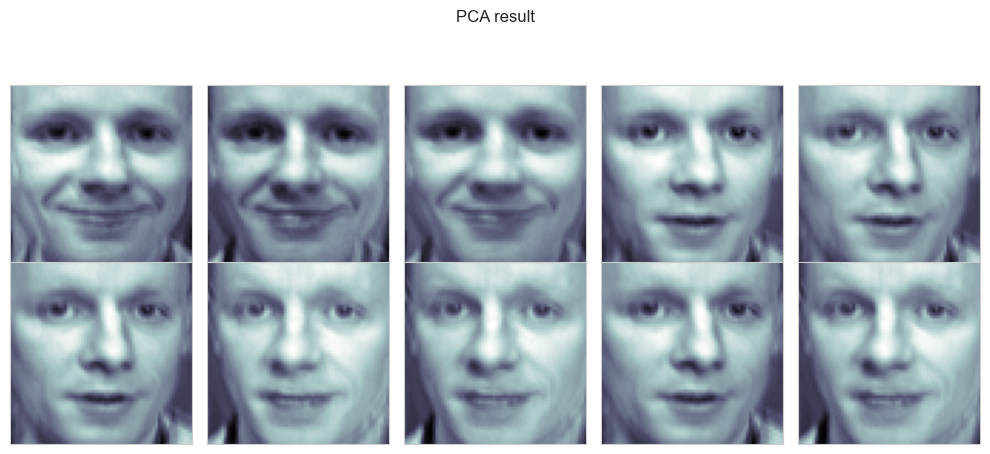

In [61]:
N = 2
M = 5  

fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(X_inv[n].reshape(64, 64), cmap=plt.cm.bone)  # reshape(64, 64) : 원본과 동일하게 reshape
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle("PCA result")
plt.tight_layout()
plt.show()

### 원점과 두개의 eigen face

In [62]:
pca.mean_

array([0.37355372, 0.4053719 , 0.43760332, ..., 0.42809922, 0.4264462 ,
       0.4157025 ], dtype=float32)

In [63]:
pca.components_

array([[-0.04049517, -0.03625262, -0.02922314, ..., -0.05034614,
        -0.05550929, -0.0678875 ],
       [-0.00100303,  0.00663694,  0.00835257, ..., -0.04861156,
        -0.03207698, -0.01011706]], dtype=float32)

In [64]:
pca.components_[1]

array([-0.00100303,  0.00663694,  0.00835257, ..., -0.04861156,
       -0.03207698, -0.01011706], dtype=float32)

Text(0.5, 1.0, 'face_p2')

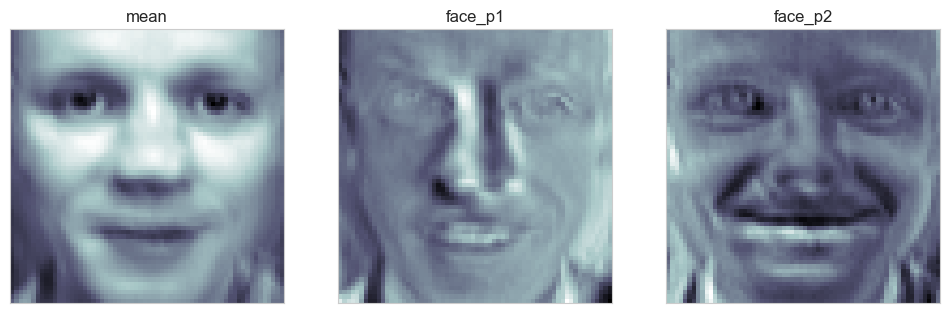

In [65]:
face_mean = pca.mean_.reshape(64, 64)
face_p1 = pca.components_[0].reshape(64, 64)
face_p2 = pca.components_[1].reshape(64, 64)

plt.figure(figsize=(12, 7))

plt.subplot(131) # 1행 3열 중 1번째
plt.imshow(face_mean, cmap = plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("mean")

plt.subplot(132)
plt.imshow(face_p1, cmap = plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("face_p1")

plt.subplot(133)
plt.imshow(face_p2, cmap = plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("face_p2")

- 10장의 사진은 이 3장으로 모두 표현할 수 있다,

### 가중치 설정

In [66]:
import numpy as np

N = 2
M = 5
w = np.linspace(-5, 10, N*M)  # -5부터 10까지 숫자 10개(등간격)
w

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

### 첫번째 성분의 변화

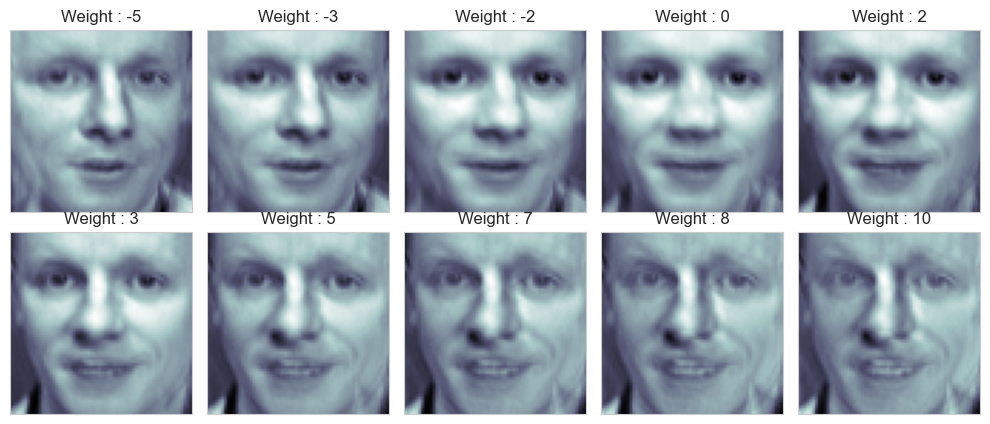

In [67]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + (w[n] * face_p1), cmap = plt.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("Weight : " + str(round(w[n])))

plt.tight_layout()
plt.show()

- 표정이 조금씩 변한다.(입모양)

### 두번째 성분의 변화

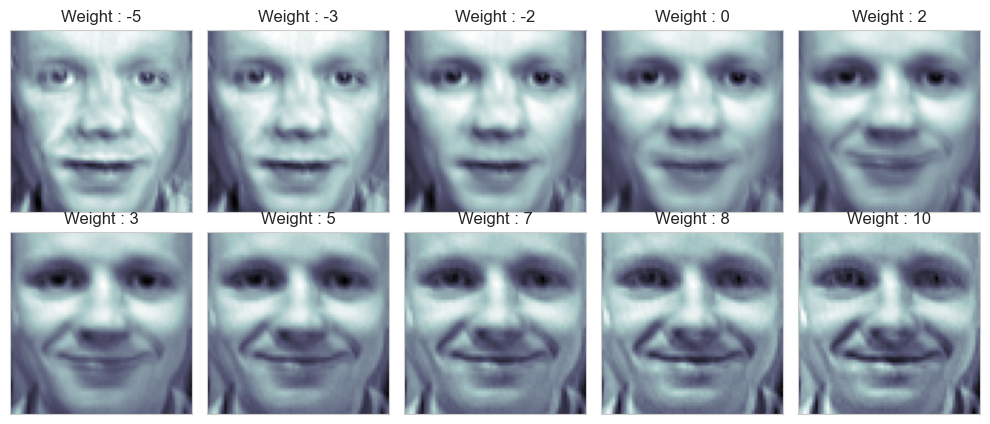

In [68]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + (w[n] * face_p2), cmap = plt.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("Weight : " + str(round(w[n])))

plt.tight_layout()
plt.show()

- 표정이 조금씩 변한다.(입모양)

### 두 성분을 다 표현해보기
- 가중치 변화에 따른 얼굴변화를 두 성분 한번에 보기 위한 것

In [71]:
nx, ny = (5, 5)
x = np.linspace(-5, 8, nx)
y = np.linspace(-5, 8, ny)

w1, w2 = np.meshgrid(x, y)
w1, w2

(array([[-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ]]),
 array([[-5.  , -5.  , -5.  , -5.  , -5.  ],
        [-1.75, -1.75, -1.75, -1.75, -1.75],
        [ 1.5 ,  1.5 ,  1.5 ,  1.5 ,  1.5 ],
        [ 4.75,  4.75,  4.75,  4.75,  4.75],
        [ 8.  ,  8.  ,  8.  ,  8.  ,  8.  ]]))

### shape 조정
- 나중에 실제 이미지 데이터와 합치기 용이하게 만드는 작업

In [72]:
w1.shape

(5, 5)

In [73]:
w1 = w1.reshape(-1,)
w2 = w2.reshape(-1,)

w1.shape

(25,)

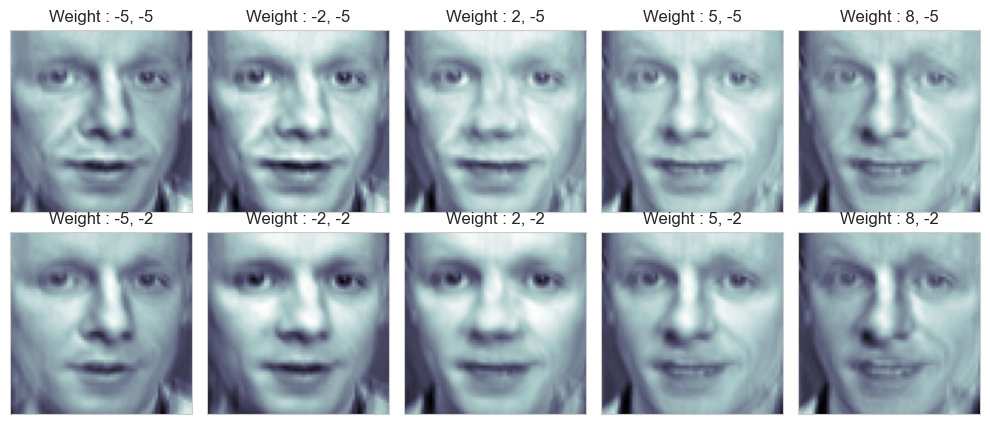

In [76]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + (w1[n] * face_p1) + (w2[n] * face_p2), cmap = plt.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("Weight : " + str(round(w1[n])) + ', ' + str(round(w2[n])))

plt.tight_layout()
plt.show()

---
# PCA eigenface - HAR 데이터
- IMU 센서를 활용해 사람의 행동을 인식하는 실험(5-3 참고)
- [관련 유툽 영상](https://www.youtube.com/watch?v=XOEN9W05_4A)

## (1) 데이터 가져오기

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt"
feature_name_df = pd.read_csv(url, sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()

### X데이터 가져오기

In [2]:
X_train_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt"
X_test_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt"

X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)

In [3]:
# 컬럼 이름 설정

X_train.columns = feature_name
X_test.columns = feature_name
X_train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
0         -0.923527         -0.934724  ...                        -0.074323   
1         -0.957686         -0.943068  ...                         0.158075   
2         -0.977469         -0.938692  ...                         0.414503   
3         -0.989302         -0.938692  ...                         0.404573   
4         -0.990441         -0.942469  ...                         0.087753   

   fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
0                        -0.298676                        -0.710304   
1                        -0.595051                        -0.861499   
2                        -0.390748                        -0.760104   
3                        -0.117290                        -0.482845   
4                        -0.351471                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  
0             -0.841247              0.179941             -0.058627  
1             -0.844788              0.180289             -0.054317  
2             -0.848933              0.180637             -0.049118  
3             -0.848649              0.181935             -0.047663  
4             -0.847865              0.185151             -0.043892  

[5 rows x 561 columns]

### y데이터 가져오기

In [4]:
y_train_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt"
y_test_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt"

y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

## (2) PCA 적용

### 　 PCA 결과를 반환하는 함수 (위에랑 동일)

In [7]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):  # n_components=2 : 입력된 데이터의 n개 특성을 2개로 압축
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)
    
    return pca.transform(ss_data), pca

### 　PCA fit

In [9]:
HAR_pca , pca = get_pca_data(X_train, n_components=2)
HAR_pca.shape

(7352, 2)

-  n_components=2 로 설정해서 (7352, 561)에서 (7352, 2)로 변경됨

In [10]:
pca.mean_.shape, pca.components_.shape

((561,), (2, 561))

In [11]:
pca.components_.shape[0]

2

### 　컬럼명을 생성하는 반복문

In [12]:
cols = ['pca_' + str(n) for n in range(pca.components_.shape[0])]
cols

['pca_0', 'pca_1']

### 　PCA 결과를 저장하는 함수

In [13]:
def get_pd_from_pca(pca_data, col_num):
    cols = ['pca_' + str(n) for n in range(col_num)]
    
    return pd.DataFrame(pca_data, columns=cols)

### 　HAR 데이터에 적용

In [15]:
HAR_pca , pca = get_pca_data(X_train, n_components=2)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

pca_0     pca_1  action
0 -5.520280 -0.290278       5
1 -5.535350 -0.082530       5
2 -5.474988  0.287387       5
3 -5.677232  0.897031       5
4 -5.748749  1.162952       5

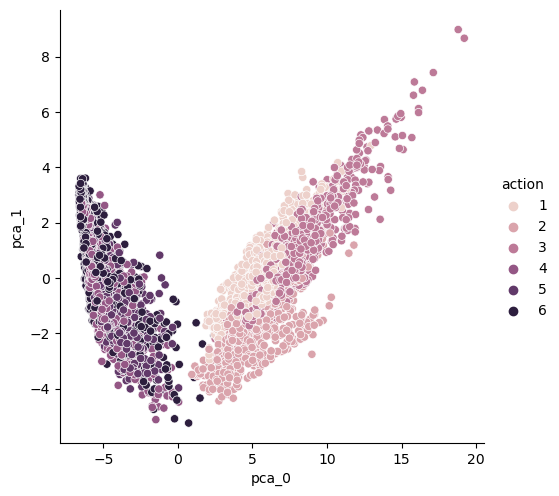

In [17]:
import seaborn as sns

sns.pairplot(HAR_pd_pca, hue='action', height=5, x_vars=['pca_0'], y_vars=['pca_1']);

- 500개가 넘는 특성을 2개로 줄이니 별로 성능이 좋아보이진 않음..

In [20]:
import numpy as np

def print_variance_ratio(pca):
    print('variance ratio : ', pca.explained_variance_ratio_)
    print('Sum of variance ratio : ', np.sum(pca.explained_variance_ratio_))

print_variance_ratio(pca)

variance ratio :  [0.6255444  0.04913023]
Sum of variance ratio :  0.6746746270487938


- 주성분 2개로는 전체 데이터의 67%만 설명 가능

### 　주성분을 3개로 해보자!

In [21]:
HAR_pca , pca = get_pca_data(X_train, n_components=3)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train


print_variance_ratio(pca)

variance ratio :  [0.6255444  0.04913023 0.04121467]
Sum of variance ratio :  0.7158893015785893


- 71% 까지 상승!

### 　주성분을 10개로 해보자!

In [23]:
HAR_pca , pca = get_pca_data(X_train, n_components=10)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train


print_variance_ratio(pca)

variance ratio :  [0.6255444  0.04913023 0.04121467 0.01874956 0.0169486  0.01272069
 0.01176685 0.01068973 0.00969379 0.00858001]
Sum of variance ratio :  0.8050385375268057


- 오 80%

## (3) RandomForest 에 PCA 데이터 적용

### 　과거랑 비교하기
- 　5-3.앙상블기법 에서 했던 것

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

In [27]:
%%time

params = {'max_depth' : [6, 8, 10],
         'n_estimators' : [50, 100, 200],   # 나무 몇그루 사용할 것인지
         'min_samples_leaf' : [8, 12],      # 잎에 할당되는 최소 데이터 수 / max_depth에 도달하지 않았어도 
         'min_samples_split' : [8, 12]}     # 분할할때 남는 데이터를 최소 몇개로 설정할 것인지

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)    # n_jobs : cpu 코어를 몇새 사용할 것인가(-1: 다 사용)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(HAR_pca, y_train.values.reshape(-1,))

CPU times: total: 6.39 s
Wall time: 41.5 s


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

- 컬럼이 10개로 줄어서 시간이 많이 단축되었다.

### 　위 모델 성능 확인

In [29]:
cv_res_df = pd.DataFrame(grid_cv.cv_results_)
cv_res_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [28]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_res_df[target_col].sort_values('rank_test_score').head(8)

rank_test_score  mean_test_score param_n_estimators param_max_depth
29                1         0.837323                200              10
26                1         0.837323                200              10
17                3         0.837187                200               8
14                3         0.837187                200               8
32                5         0.837051                200              10
35                5         0.837051                200              10
1                 5         0.837051                100               6
4                 5         0.837051                100               6

- 원본 데이터로 했을때(91%)보단 성능은 조금 나쁘다.

### 　best 파라미터 확인

In [30]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 200}

In [31]:
grid_cv.best_score_

0.8373231773667029

### 　테스트 데이터에 적용

In [32]:
from sklearn.metrics import accuracy_score

rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(HAR_pca, y_train.values.reshape(-1, ))

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=200, n_jobs=-1, random_state=13)

In [33]:
pred1 = rf_clf_best.predict(pca.transform(X_test))

accuracy_score(y_test, pred1)

0.8551068883610451

- pca.transform(X_test) : X_test 는 아직 pca적용을 안한, 컬럼이 500개가 넘는 데이터기 때문에, 컬럼을 10개로 바꿔줘야 한다!
- 이때 fit 이나 fit_transform 을 할 경우, X_test 데이터가 오염된다.
- 따라서 반드시 그냥 transform 해야 한다.

## (4) Xgboost 에 PCA 데이터 적용

In [69]:
# invalid classes inferred from unique values of `y`. expected: [0 1 2 3 4 5], got [1 2 3 4 5 6] 에러 해결

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

C:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
from xgboost import XGBClassifier

evals = [(pca.transform(X_test), y_test_le)]

In [73]:
%%time

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(HAR_pca, y_train_le, early_stopping_rounds=10, eval_set=evals)

[0]	validation_0-mlogloss:1.61430
[1]	validation_0-mlogloss:1.47582
[2]	validation_0-mlogloss:1.35838


C:\Users\user\miniconda3\envs\ds_study\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-mlogloss:1.26295
[4]	validation_0-mlogloss:1.18073
[5]	validation_0-mlogloss:1.11102
[6]	validation_0-mlogloss:1.04544
[7]	validation_0-mlogloss:0.98800
[8]	validation_0-mlogloss:0.93975
[9]	validation_0-mlogloss:0.89204
[10]	validation_0-mlogloss:0.85126
[11]	validation_0-mlogloss:0.81418
[12]	validation_0-mlogloss:0.78056
[13]	validation_0-mlogloss:0.74946
[14]	validation_0-mlogloss:0.72327
[15]	validation_0-mlogloss:0.69807
[16]	validation_0-mlogloss:0.67645
[17]	validation_0-mlogloss:0.65466
[18]	validation_0-mlogloss:0.63535
[19]	validation_0-mlogloss:0.61798
[20]	validation_0-mlogloss:0.60192
[21]	validation_0-mlogloss:0.58530
[22]	validation_0-mlogloss:0.57089
[23]	validation_0-mlogloss:0.55730
[24]	validation_0-mlogloss:0.54525
[25]	validation_0-mlogloss:0.53506
[26]	validation_0-mlogloss:0.52468
[27]	validation_0-mlogloss:0.51469
[28]	validation_0-mlogloss:0.50612
[29]	validation_0-mlogloss:0.49699
[30]	validation_0-mlogloss:0.48866
[31]	validation_0-mlogloss:

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [75]:
accuracy_score(y_test_le, xgb.predict(pca.transform(X_test)))

0.8663047166610112

- 꽤나 좋은 성능!